<a href="https://colab.research.google.com/github/ririssilvia/-Pemrograman-Mobile-project-hello_world/blob/master/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np

# **Tugas Praktikum**

Tugas 1 : Buat Gamma Correction

 Gamma Correction Pada citra 
---------------------------------
Masukkan nilai Gamma: 3


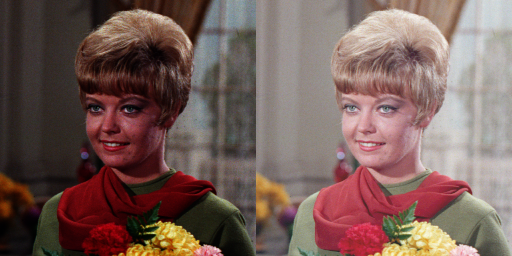

In [18]:
print(' Gamma Correction Pada citra ')
print('---------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Erorr, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_gamma = np.zeros(original.shape, original.dtype)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Rumus Gamma Correction
     img_gamma[y,x,c] = np.clip(255 * ((original[y,x,c] / 255)**(1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, img_gamma))
cv2_imshow(final_frame)

Tugas 2 : Buat Simulasi Image Depth

 Simulasi Image Depth 
----------------------------------
masukkan nilai bit-depth : 3


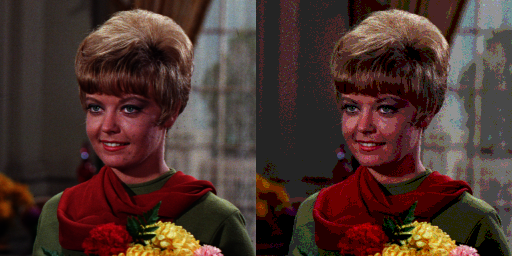

In [19]:
print(' Simulasi Image Depth ')
print('----------------------------------')
try:
  depth = int(input('masukkan nilai bit-depth : '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/female.tiff')
img_depth = np.zeros(original.shape, original.dtype)

# Rumus menentukan level 
level = 255 / ((2**depth) - 1)

# Akses gambar tiap pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      # Rumus Bit Depth
      img_depth[y,x,c] = np.clip(round(original[y,x,c]/level)*level, 0, 255)

final_frame = cv.hconcat((original, img_depth))
cv2_imshow(final_frame)

Tugas 3 : Buat modul Average Denoising

In [37]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)



In [38]:
def PSNR(img1, img2):#funci pnsr in liat di modul
  mse = np.mean((img1 - img2) ** 2)
  if(mse==0):
    return 100
  
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel/sqrt(mse))
  return psnr

#average 5
ori_img = cv_img[0]
noise_img = cv_img[5]

noise = PSNR(ori_img, noise_img)
print('Nilai PSNR Average 5 adalah',noise,'(dB)')

final_frame = cv.hconcat((ori_img, noise_img))
cv2_imshow(final_frame)

IndexError: ignored

In [35]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[4]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 5')
print('Nilai PSNR =', psnr, 'dB')

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

IndexError: ignored

Tugas 4 : Buat image masking 

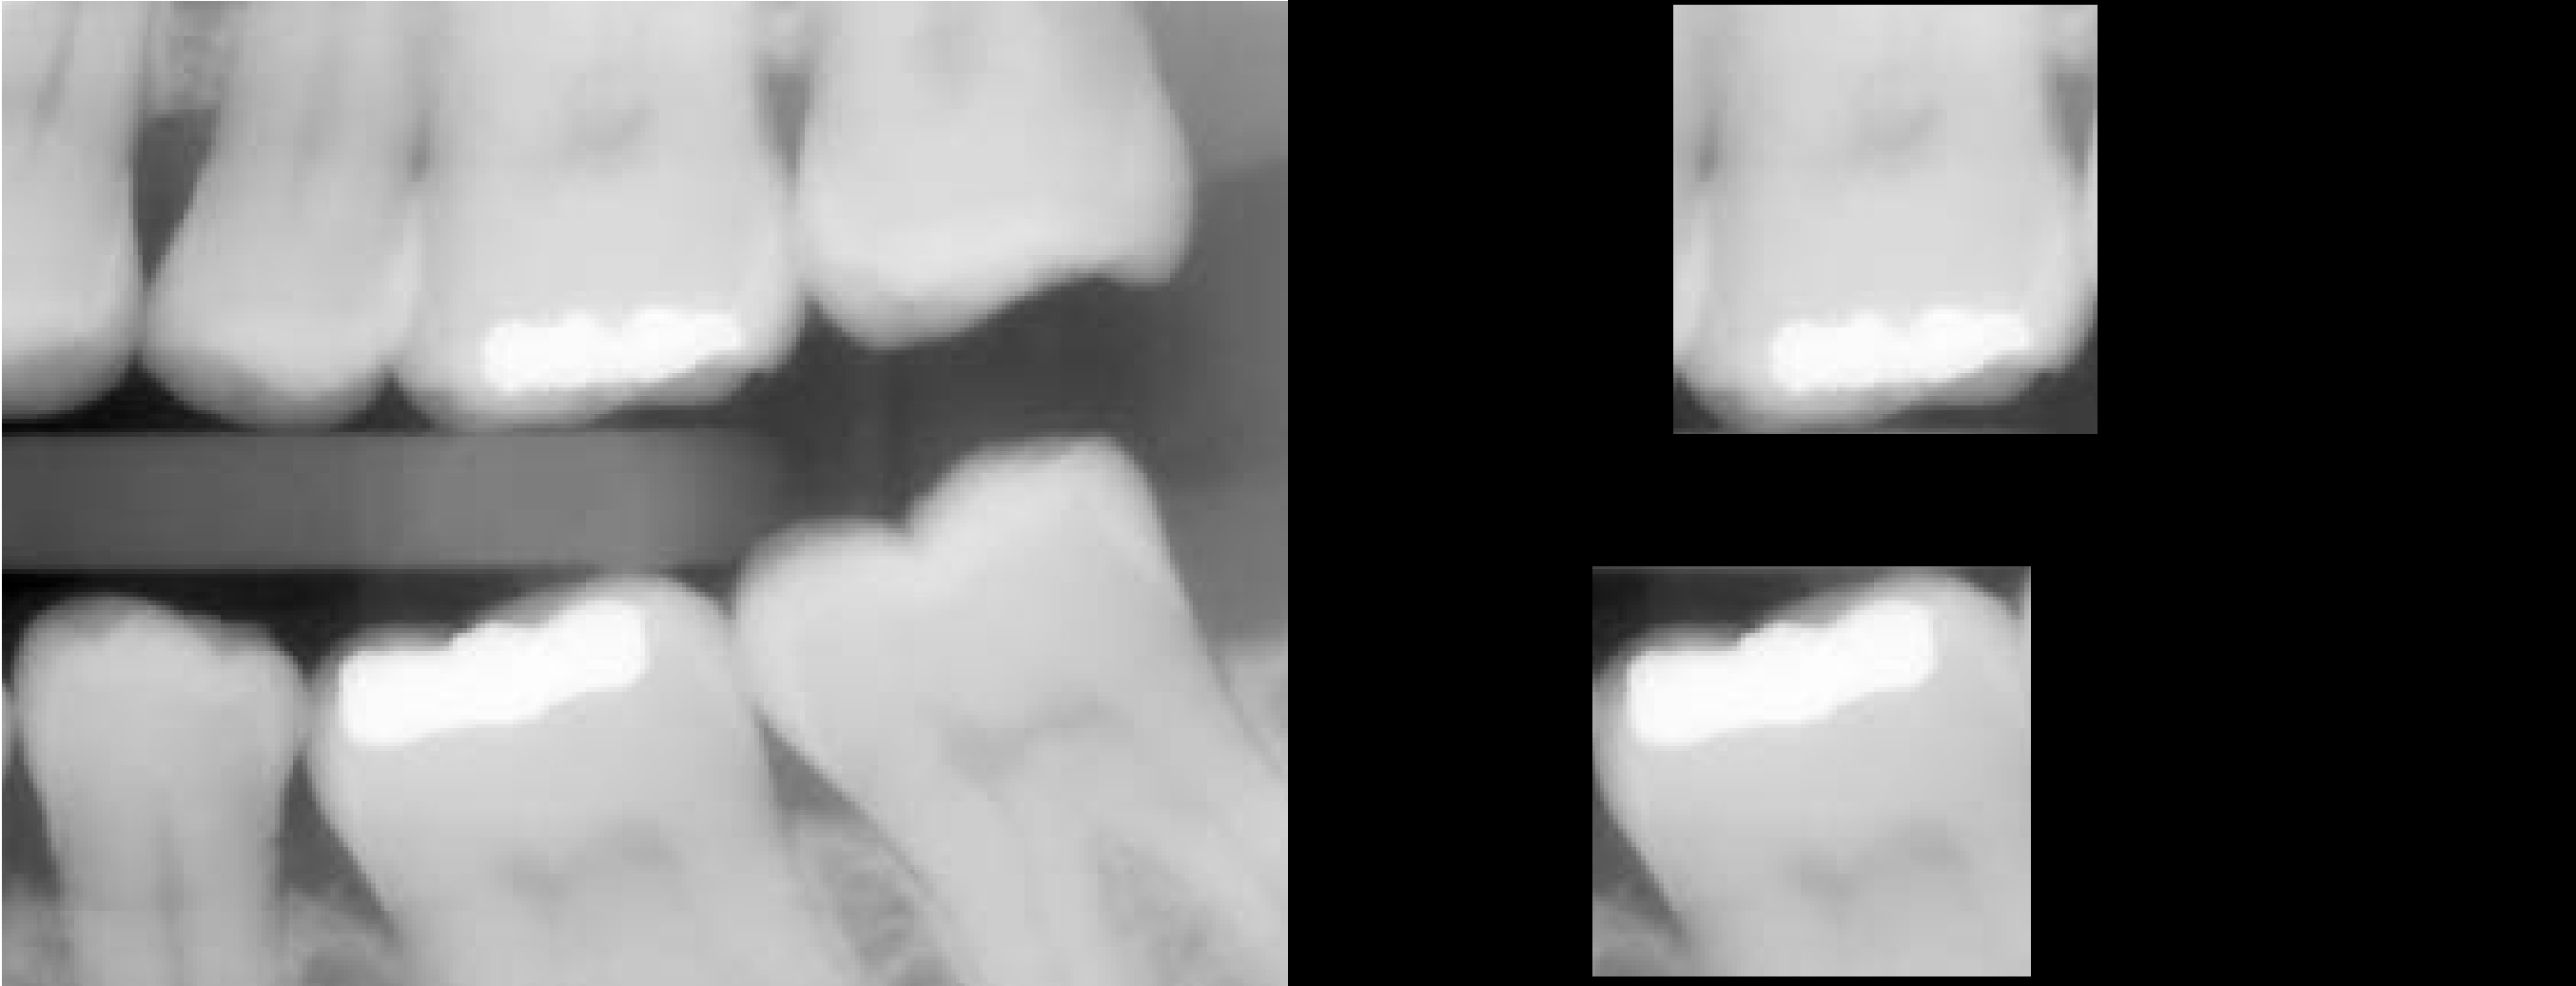

In [39]:
original = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
teeth_mask = np.zeros(original.shape, dtype = np.uint8)

teeth_mask = cv.rectangle(teeth_mask, pt1 = (320, 595), pt2 = (780, 1025), color=(255,255,255), thickness =-1)
result = original & teeth_mask

teeth_mask1 = cv.rectangle(teeth_mask, pt1 = (405, 5), pt2 = (850, 455), color=(255,255,255), thickness =-1)
result = original & teeth_mask1

final_frame = cv.hconcat((original, result))
cv2_imshow(final_frame)

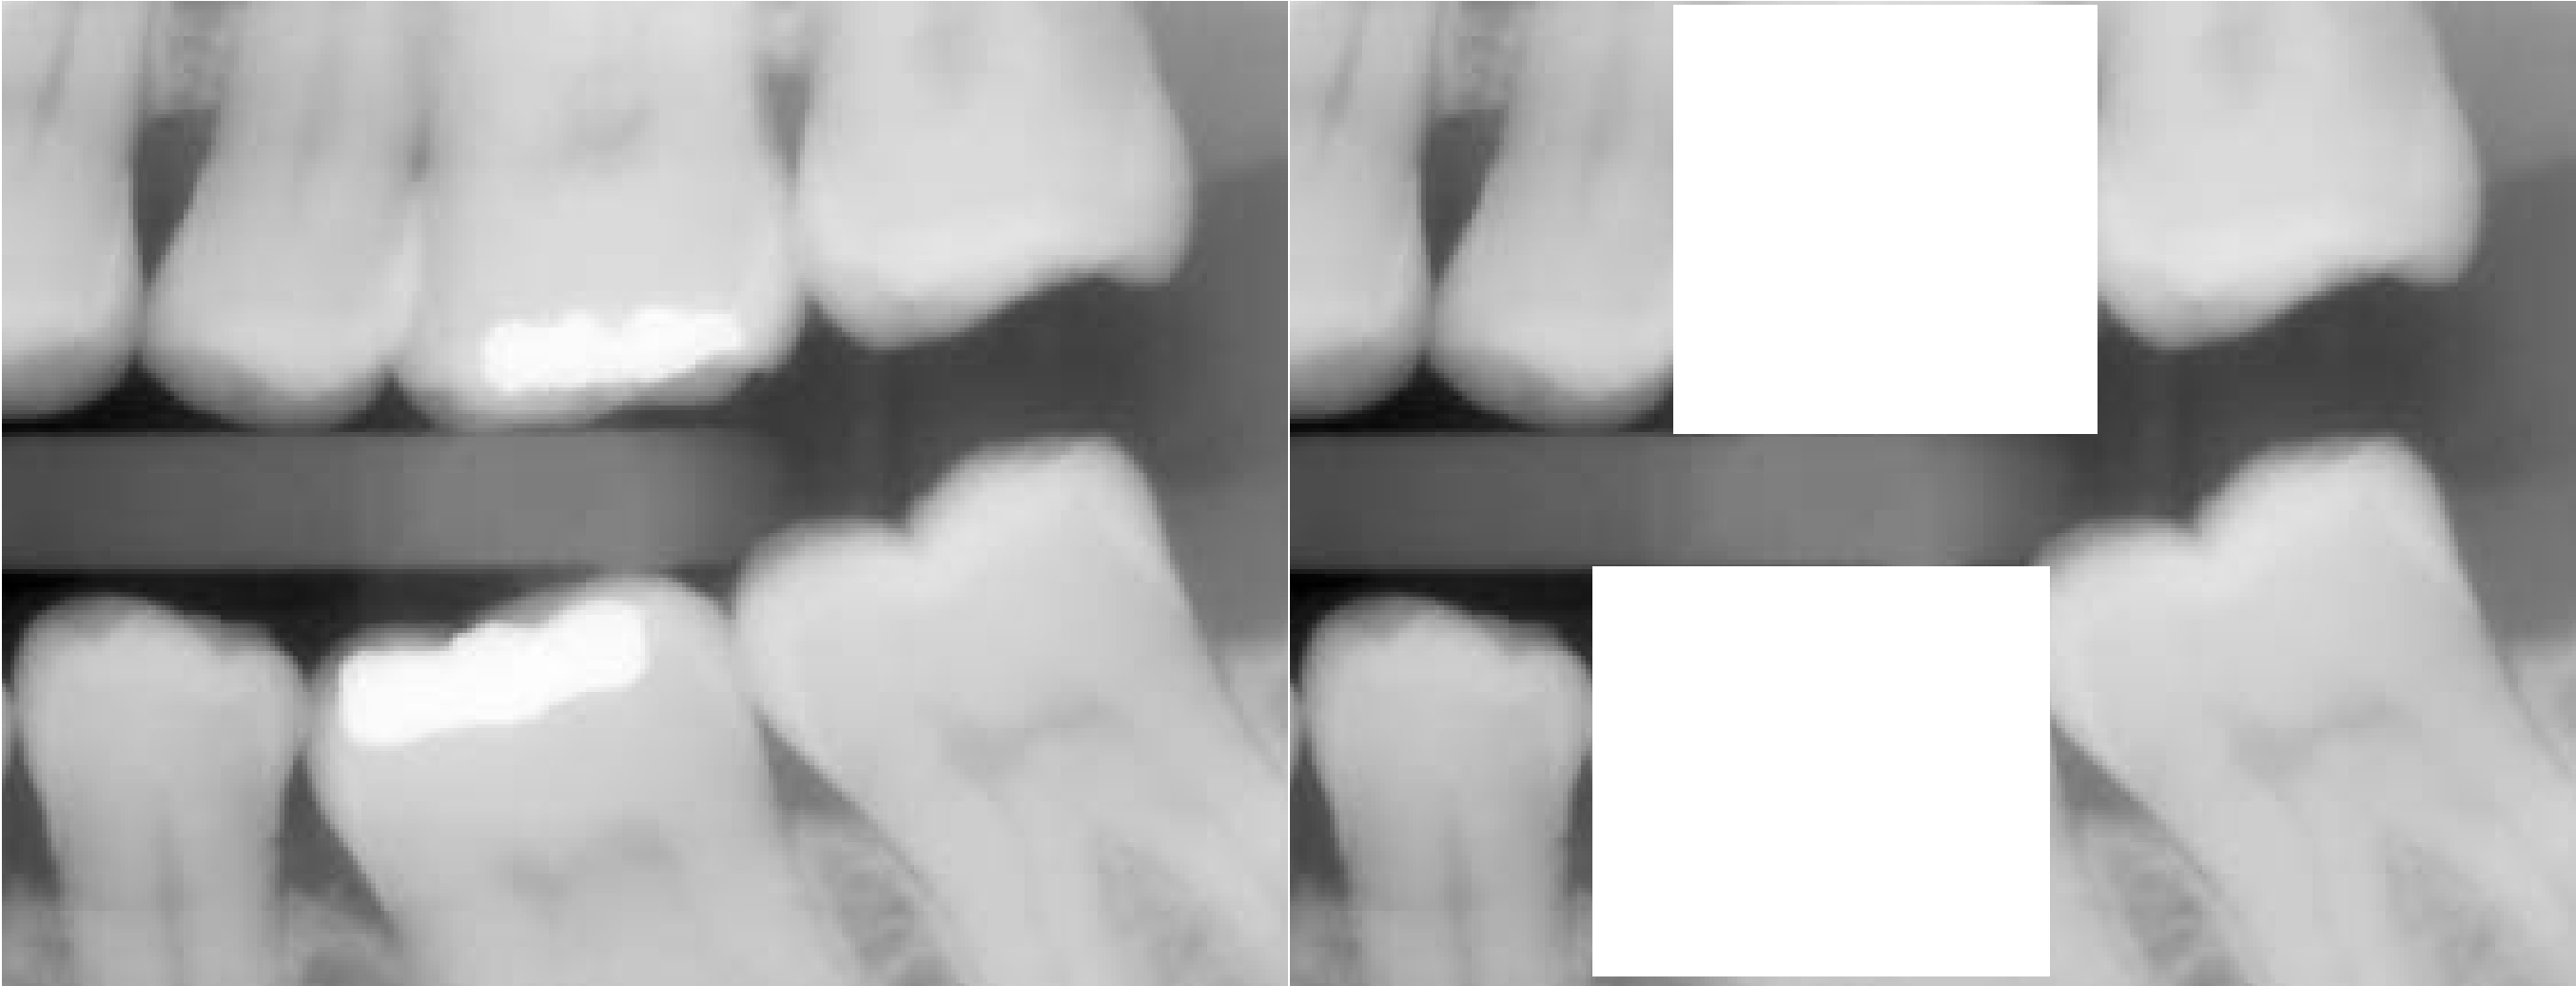

In [41]:
original = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
mask_or = np.zeros(original.shape, dtype=np.uint8)

mask_or = cv.rectangle(mask_or, pt1=(320,595), pt2=(800,1025), color=(255,255,255), thickness=-1)
result = original | mask_or

mask_or1 = cv.rectangle(mask_or, pt1=(405,5), pt2=(850,455), color=(255,255,255), thickness=-1)
result_or1 = original | mask_or1

final_frame = cv.hconcat((original, result_or1))
cv2_imshow(final_frame)

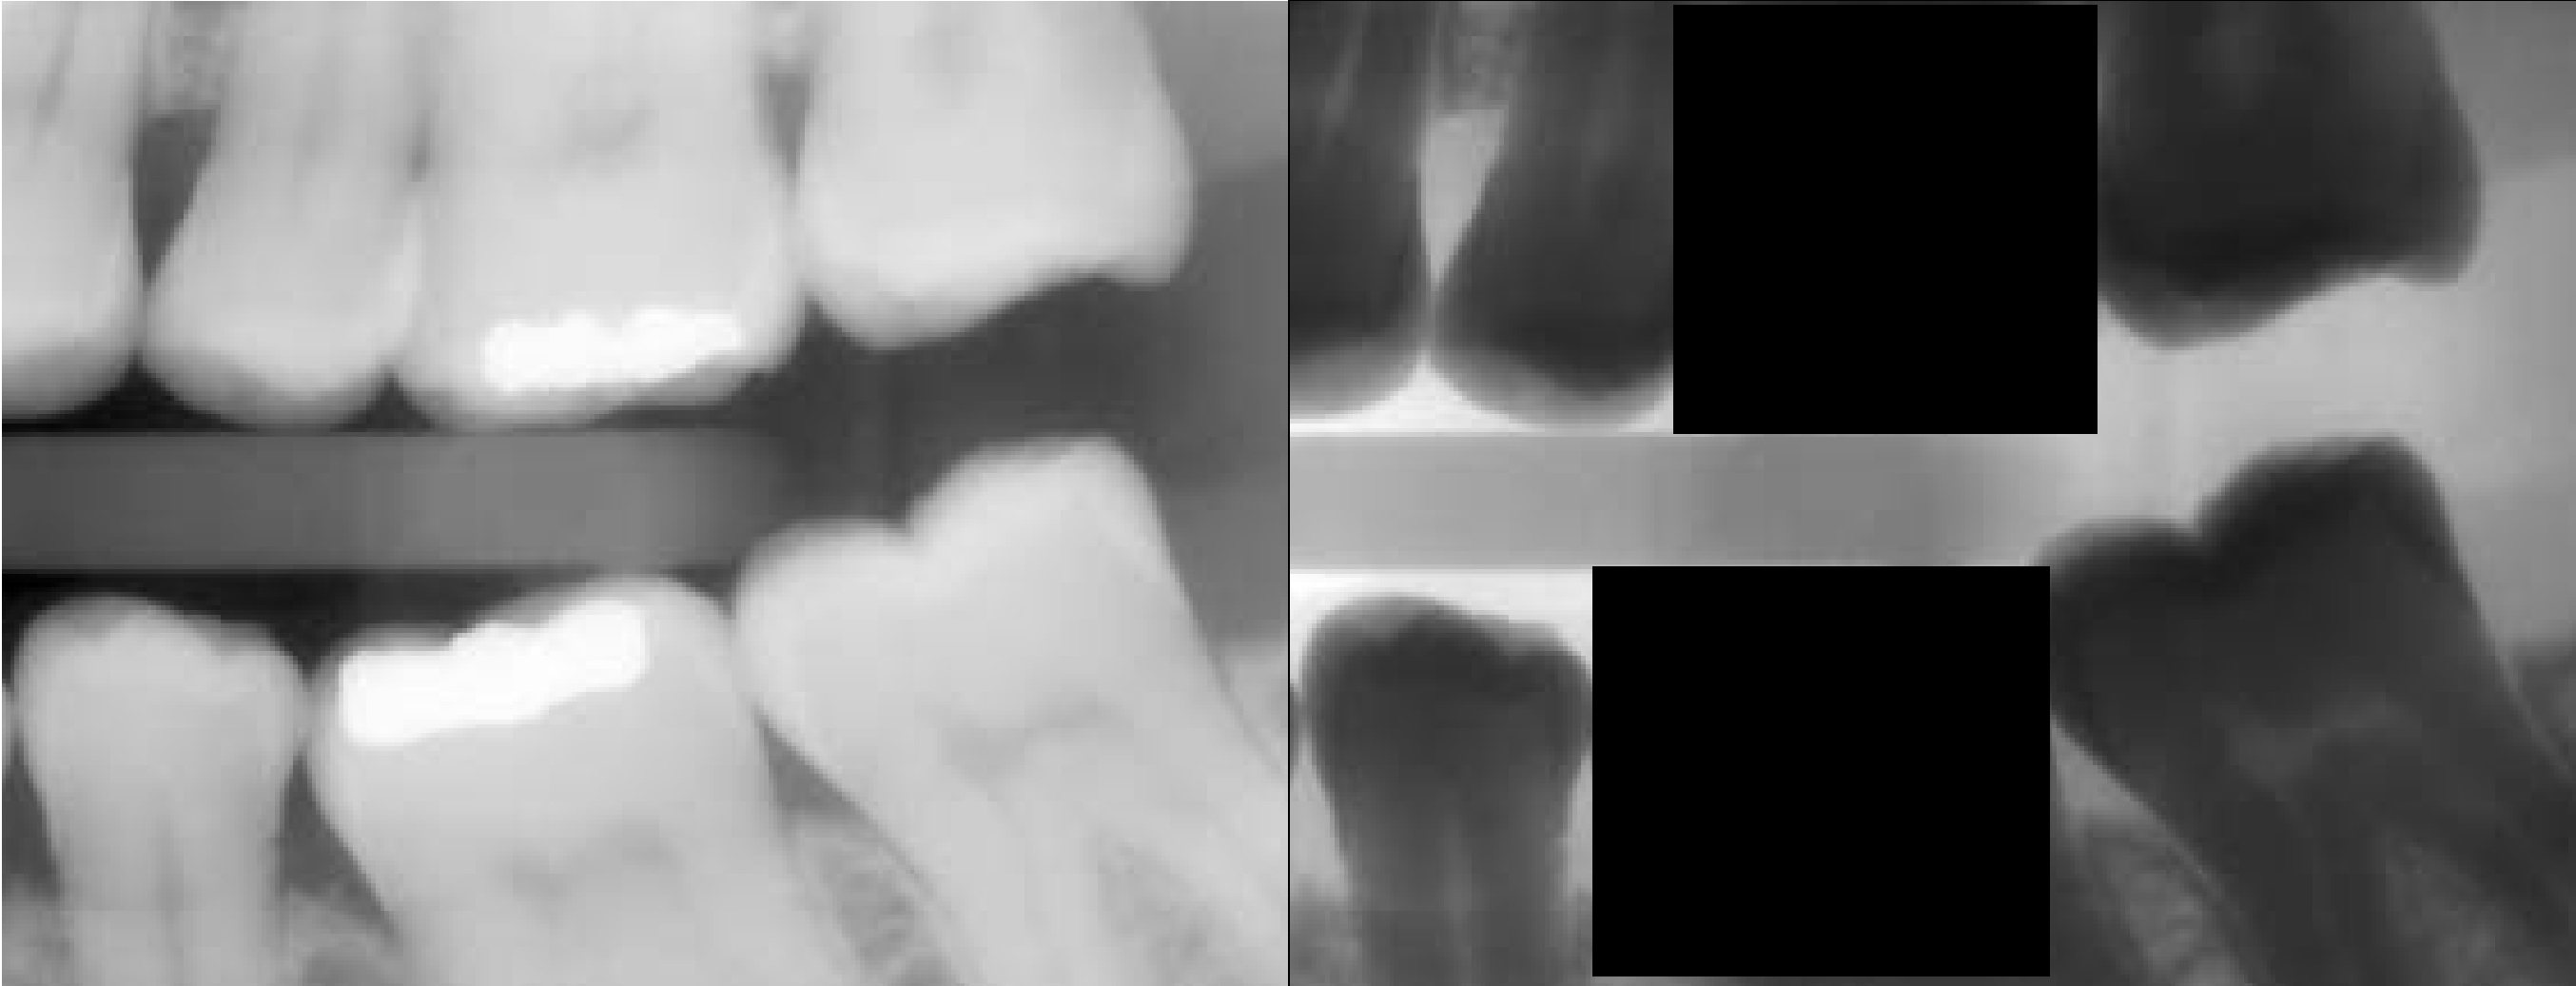

In [42]:
image = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
mask_not = np.zeros(image.shape, dtype=np.uint8)

mask_not = cv.rectangle(mask_not, pt1=(405,5), pt2=(850,455), color=(255,255,255), thickness=-1)
result = image | mask_not

result_not1 = ~image & ~mask_or1

final_frame = cv.hconcat((image, result_not1))
cv2_imshow(final_frame)

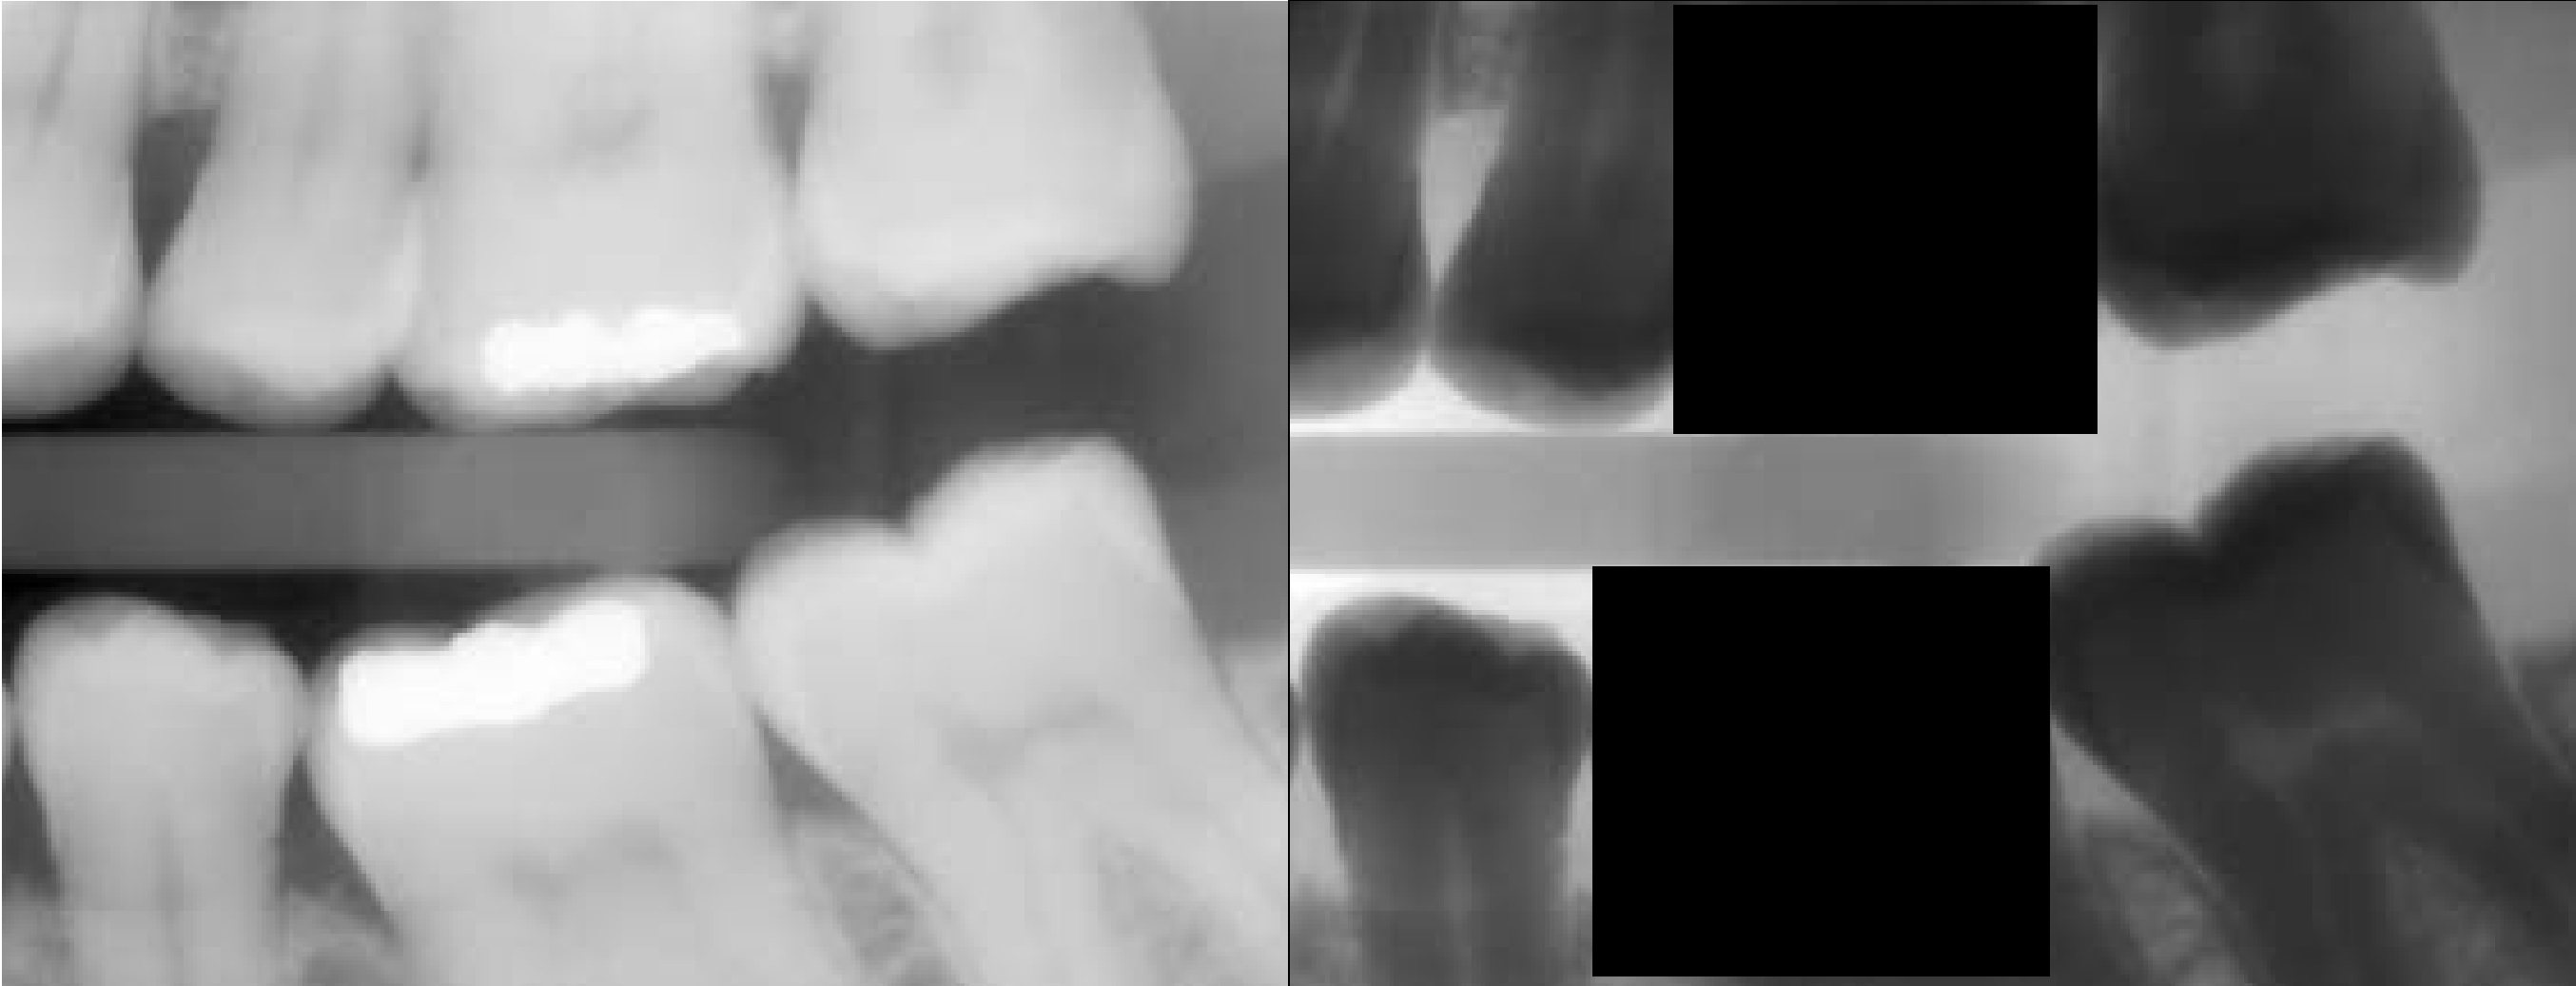

In [43]:
image = cv.imread('/content/drive/MyDrive/PCVK/teeth.jpg')
mask_xor = np.zeros(image.shape, dtype=np.uint8)

mask_xor1 = cv.rectangle(mask_not, pt1=(320,595), pt2=(800,1025), color=(255,255,255), thickness=-1)
result = image ^ mask_not

result_xor1 = image ^ mask_xor1

final_frame = cv.hconcat((image, result_not1))
cv2_imshow(final_frame)